In [2]:
import pandas as pd
import numpy as np

In [3]:
df = pd.read_csv('Downloads\\UDEMY_TSA_FINAL (4)\\UDEMY_TSA_FINAL\\Data\\RestaurantVisitors.csv',
                 index_col='date', parse_dates=True)
df.index.freq='D'
df

,weekday,holiday,holiday_name,rest1,rest2,rest3,rest4,total
date,,,,,,,,
2016-01-01,Friday,1,New Year's Day,65.0,25.0,67.0,139.0,296.0
2016-01-02,Saturday,0,na,24.0,39.0,43.0,85.0,191.0
2016-01-03,Sunday,0,na,24.0,31.0,66.0,81.0,202.0
2016-01-04,Monday,0,na,23.0,18.0,32.0,32.0,105.0
2016-01-05,Tuesday,0,na,2.0,15.0,38.0,43.0,98.0
2016-01-06,Wednesday,0,na,9.0,11.0,22.0,41.0,83.0
2016-01-07,Thursday,0,na,15.0,6.0,18.0,30.0,69.0
2016-01-08,Friday,0,na,79.0,32.0,22.0,16.0,149.0
2016-01-09,Saturday,0,na,44.0,44.0,47.0,99.0,234.0


In [5]:
df1= df.dropna()

In [6]:
cols=['rest1', 'rest2', 'rest3','rest4','total']
for column in cols:
    df1[column]= df1[column].astype(int)


C:\Users\ahmed\anaconda3\envs\tsa_course\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [7]:
from statsmodels.tsa.seasonal import seasonal_decompose

In [8]:
train=df1.iloc[:436]
test =df1.iloc[436:]

In [9]:
from pmdarima import auto_arima

In [10]:
df1[['holiday']].head()

,holiday
date,
2016-01-01,1
2016-01-02,0
2016-01-03,0
2016-01-04,0
2016-01-05,0


In [11]:
auto_arima(df1['total'], exogeneous = df1[['holiday']], seasonal=True, m=7).summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 SARIMAX Results                                 
=================================================================================
Dep. Variable:                         y   No. Observations:                  478
Model:             SARIMAX(1, 0, [1], 7)   Log Likelihood               -2394.385
Date:                   Wed, 28 Jul 2021   AIC                           4796.770
Time:                           13:04:20   BIC                           4813.448
Sample:                                0   HQIC                          4803.327
                                   - 478                                         
Covariance Type:                     opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      8.5357      2.613      3.267      0.001       3.415      13.657
ar.S.L7        0.9378      0.019     49.631      0.000       0.901       0.975
ma.S.L7       -0.6689      0.061    -10.971      0.000      -0.788      -0.549
sigma2      1453.4406    100.822     14.416      0.000    1255.833    1651.048
===================================================================================
Ljung-Box (L1) (Q):                  16.79   Jarque-Bera (JB):                47.77
Prob(Q):                              0.00   Prob(JB):                         0.00
Heteroskedasticity (H):               0.86   Skew:                             0.67
Prob(H) (two-sided):                  0.36   Kurtosis:                         3.78
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [12]:
from statsmodels.tsa.statespace.sarimax import SARIMAX
model =SARIMAX(train['total'], exogenous = df1[['holiday']], order=(0,0,0), seasonal_order=(1,0,1,7), 
              enforce_invertibility=False )

In [13]:
result = model.fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 SARIMAX Results                                 
=================================================================================
Dep. Variable:                     total   No. Observations:                  436
Model:             SARIMAX(1, 0, [1], 7)   Log Likelihood               -2165.369
Date:                   Wed, 28 Jul 2021   AIC                           4336.738
Time:                           13:04:21   BIC                           4348.970
Sample:                       01-01-2016   HQIC                          4341.565
                            - 03-11-2017                                         
Covariance Type:                     opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.S.L7        0.9999   9.57e-05   1.05e+04      0.000       1.000       1.000
ma.S.L7       -0.9384      0.024    -39.207      0.000      -0.985      -0.891
sigma2      1111.7990     58.740     18.927      0.000     996.671    1226.927
===================================================================================
Ljung-Box (L1) (Q):                  15.40   Jarque-Bera (JB):                83.57
Prob(Q):                              0.00   Prob(JB):                         0.00
Heteroskedasticity (H):               0.96   Skew:                             0.72
Prob(H) (two-sided):                  0.81   Kurtosis:                         4.59
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [14]:
start = len(train)
end = len(train)+len(test)-1

In [15]:
predict = result.predict(start,end,exogenous=test[['holiday']]).rename('sarimax')

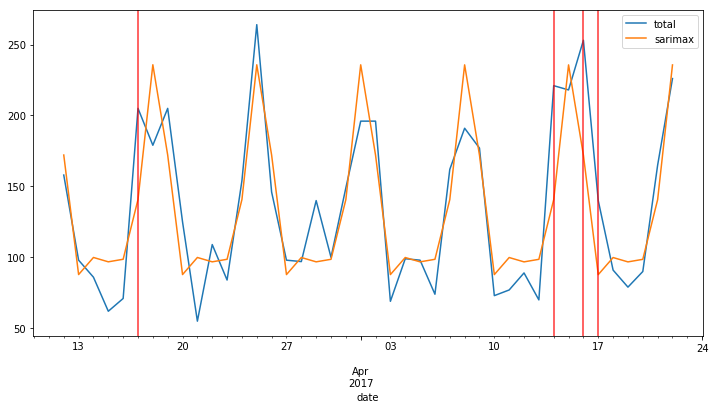

In [16]:
ax=test['total'].plot(legend=True, figsize=[12,6]);
predict.plot(legend=True)
for x in test.query('holiday==1').index:
  ax.axvline(x=x,color='red', alpha=0.8);

In [17]:
from statsmodels.tools.eval_measures import rmse

In [18]:
rmse(test['total'], predict)

31.91235831543444

In [19]:
mod = SARIMAX(df1['total'], exog = df1[['holiday']], order=(1,0,1), seasonal_order=(1,0,1,7), 
              enforce_invertibility=False )

In [20]:
res = mod.fit()

C:\Users\ahmed\anaconda3\envs\tsa_course\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)


In [21]:
exog_forecaste=df[478:][['holiday']]

In [22]:
fcast = res.predict(len(df1), len(df1)+38, exog = exog_forecaste).rename('SRIMAX forecaste')

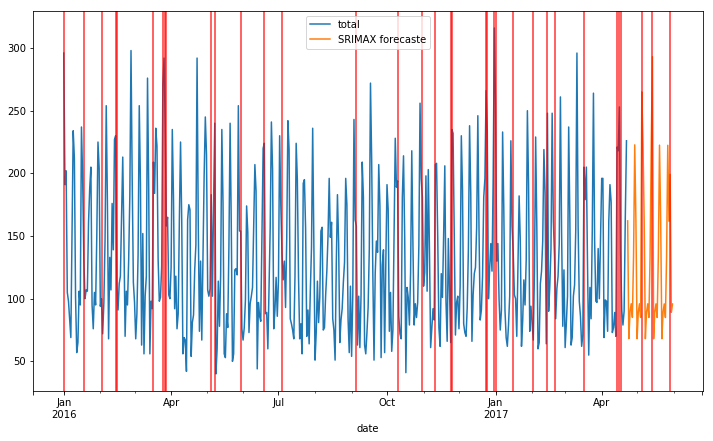

In [24]:
ax=df1['total'].plot(figsize=[12,7], legend=True);
fcast.plot(legend=True);

for x in df.query('holiday==1').index:
  ax.axvline(x=x,color='red', alpha=0.8);

